In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 9)

<br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 1: Acquire the Data

Here, we start by acquiring the data that this lab is based on. **Please don't worry about understanding all the code in this section**; the steps shown here are out of scope and provided here for student interest!

**1. Obtain data**<br/>
To retrieve the dataset, we will use the `ds100_utils.download_lab3_data` utility, a helper function that Data 100 staff created. You can see how this is implemented by opening the file `ds100_utils.py` on the left.

In [2]:
# Run this cell to download the data, no further action is needed.
from ds100_utils import download_lab3_data

dest_path = download_lab3_data()
print(f'Located at {dest_path}')

Using cached version that was downloaded (UTC): Thu Feb 27 19:58:11 2025
Located at data\lab03_data_sp24.zip


**2. Unzip file**<br/>
We will now directly unzip the ZIP archive and start working with the uncompressed files.

In [3]:
# Run this cell to unzip the data, no further action is needed.
my_zip = zipfile.ZipFile(dest_path, 'r')
my_zip.extractall('data')

There is no single right answer regarding whether to work with compressed files in their compressed state or to uncompress them on disk permanently. For example, if you need to work with multiple tools on the same files or write many notebooks to analyze them—and they are not too large—it may be more convenient to uncompress them once. But you may also have situations where you find it preferable to work with the compressed data directly.  

`Python` gives you tools for both approaches, so it can be helpful to know how to perform both tasks in order to choose the one that best suits the problem at hand.

**3. View files**

Now, we'll use the `os` package to list all files in the `data` directory. `os.walk()` recursively traverses the directory, and `os.path.join()` creates the full pathname of each file.

If you're interested in learning more, check out the `Python3` documentation pages for `os.walk` ([link](https://docs.python.org/3/library/os.html#os.walk)) and `os.path.join` ([link](https://docs.python.org/3/library/os.path.html#os.path.join)).

We use `Python3` [format strings](https://docs.python.org/3/tutorial/inputoutput.html) to nicely format the printed variables `dpath` and `fpath`.

In [5]:
# Run this cell to view the content in the zip file, no further action is needed.
import os

for root, directories, filenames in os.walk('data'):
    # first, print out all directories
    for directory in directories:
        dpath = os.path.join(root, directory)
        print(f"d {dpath}")

    # next, print out all files
    for filename in filenames:
        fpath = os.path.join(root,filename)
        print(f"  {fpath}")

d data\secret
  data\Berkeley_PD_-_Calls_for_Service_2022.csv
  data\dummy.txt
  data\hello_world.py
  data\lab03_data_sp24.zip
  data\secret\do_not_readme.md


In this Lab, we'll be working with the `Berkeley_PD_-_Calls_for_Service_2022.csv` file. Feel free to check out the other files, though.

<br/>

<hr style="border: 1px solid #fdb515;" />

# Part 2: Clean and Explore the Data

Let's now load the CSV file we have into a `DataFrame`, and start exploring the data. We added a line at the top of the cell to suppress a couple of warnings related to how we use `pd.to_datetime` here, but you need not worry about that.

In [6]:
%%capture --no-stdout

# Run this cell to read the data into a DataFrame and do some initial formatting, no further action is needed.
calls = pd.read_csv("data/Berkeley_PD_-_Calls_for_Service_2022.csv")
calls['EVENTTM'] = pd.to_datetime(calls['EVENTTM']).dt.strftime('%H:%M:%S %p')

In [7]:
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,20:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,08:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,21:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,15:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA


We see that the fields include a case number, the offense type, the date and time of the offense, the "CVLEGEND" which appears to be related to the offense type, a "CVDOW" which has no apparent meaning, the date the record was added to the database, and the location spread across four fields. We can read more about each field from the City of Berkeley's [open dataset webpage](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5).

Let's also check some basic information about this `DataFrame` using the `pandas.DataFrame.info` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)) and `pandas.DataFrame.describe` methods ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)).

In [8]:
# df.info() displays name and type of each column, and
# number of non-null entries in each column
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CASENO          4490 non-null   int64 
 1   OFFENSE         4490 non-null   object
 2   EVENTDT         4490 non-null   object
 3   EVENTTM         4490 non-null   object
 4   CVLEGEND        4490 non-null   object
 5   CVDOW           4490 non-null   int64 
 6   InDbDate        4490 non-null   object
 7   Block_Location  4490 non-null   object
 8   BLKADDR         4476 non-null   object
 9   City            4490 non-null   object
 10  State           4490 non-null   object
dtypes: int64(2), object(9)
memory usage: 386.0+ KB


Note that the BLKADDR column only has 4476 non-null entries, while the other columns all have 4490 entries. This is because the `.info()` method only counts non-null entries.

In [9]:
calls.describe()

,CASENO,CVDOW
count,4.490000e+03,4490.000000
mean,2.204229e+07,3.075724
std,2.222561e+04,1.976035
min,2.200110e+07,0.000000
25%,2.202749e+07,1.000000
50%,2.203642e+07,3.000000
75%,2.204490e+07,5.000000
max,2.209134e+07,6.000000


Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the `DataFrame`. However, we still need more information about what each column represents. Let's explore the data further in Question 1.

Before we go over the fields to deduce their meanings, the cell below will verify that all the events happened in Berkeley by grouping on the `City` and `State` columns. You should see that all of our data falls into one group.

In [10]:
# .size() returns the number of rows in each DataFrameGroupBy object
calls.groupby(["City", "State"]).size()

City      State
Berkeley  CA       4490
dtype: int64

When we called `.head()` on the `DataFrame` `calls`, it seemed like `OFFENSE` and `CVLEGEND` both contained information about the type of event reported. What is the difference in meaning between the two columns? One way to probe this is to look at the `value_counts` for each `Series`.

In [11]:
calls['OFFENSE'].value_counts().head(10)

OFFENSE
THEFT MISD. (UNDER $950)    660
THEFT FELONY (OVER $950)    454
BURGLARY AUTO               446
DISTURBANCE                 437
VEHICLE STOLEN              332
THEFT FROM AUTO             294
VANDALISM                   264
ASSAULT/BATTERY MISD.       249
BURGLARY RESIDENTIAL        244
BURGLARY COMMERCIAL         174
Name: count, dtype: int64

In [12]:
calls['CVLEGEND'].value_counts().head(10)

CVLEGEND
LARCENY                   1127
BURGLARY - VEHICLE         446
DISORDERLY CONDUCT         437
ASSAULT                    344
MOTOR VEHICLE THEFT        332
LARCENY - FROM VEHICLE     294
VANDALISM                  264
BURGLARY - RESIDENTIAL     244
FRAUD                      209
BURGLARY - COMMERCIAL      174
Name: count, dtype: int64

It seems like `OFFENSE` is more specific than `CVLEGEND`, e.g., "LARCENY" vs. "THEFT FELONY (OVER $950)". If you're unfamiliar with the term, "larceny" is a legal term for theft of personal property.

To get a sense of how many sub-categories there are for each `OFFENSE`, we will set `calls_by_cvlegend_and_offense` equal to a multi-indexed `Series` where the data is first indexed on the `CVLEGEND` and then on the `OFFENSE`, and the data is equal to the number of offenses in the database that match the respective `CVLEGEND` and `OFFENSE`. As you can see, `calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"]` returns `13` which means there are 13 instances of larceny with offense of type "THEFT FROM PERSON" in the database.

In [13]:
calls_by_cvlegend_and_offense = calls.groupby(["CVLEGEND", "OFFENSE"]).size()
calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"]

np.int64(13)

<br>

---

## Question 1

In the cell below, set `answer1` equal to a `list` of strings corresponding to the possible values for `OFFENSE` when `CVLEGEND` is "LARCENY". You can type the answer manually, or you can create an expression that automatically extracts the names.


In [30]:
# census_2010s_df['Geographic Area'].str.strip('.')
answer1 = calls.OFFENSE[calls.CVLEGEND.str.contains('LARCENY')]
answer1



0                THEFT FROM AUTO
10      THEFT MISD. (UNDER $950)
16      THEFT FELONY (OVER $950)
22      THEFT FELONY (OVER $950)
23      THEFT FELONY (OVER $950)
                  ...           
4481    THEFT MISD. (UNDER $950)
4482    THEFT MISD. (UNDER $950)
4483           THEFT FROM PERSON
4484             THEFT FROM AUTO
4487             THEFT FROM AUTO
Name: OFFENSE, Length: 1421, dtype: object

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

# Part 4: Data Faithfulness vs. Reality
<br>

## Question 3
In this last part of the lab, let's extract the GPS coordinates (latitude, longitude) from the `Block_Location` of each record.

In [31]:
# An example block location entry.
calls.loc[4, 'Block_Location']

'3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.85507, -122.26677)'

### Question 3a: Regular Expressions

Use [regular expressions](https://ds100.org/course-notes/regex/regex.html) to create a new `DataFrame` `calls_lat_lon` that has two columns titled `Lat` and `Lon`, containing the respective latitude and longitude of each record in `calls`. You should use the `Block_Location` column to extract the latitude and longitude coordinates.

**Hint**: Check out the `Series.str.extract` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html?highlight=extract#pandas.Series.str.extract).

In [39]:
calls_lat_lon = calls.Block_Location.str.findall(r"[0-9]{2}.[0-9]{5}, -[0-9]{3}.[0-9]{5}")
calls_lat_lon


0       [37.86988, -122.27054]
1       [37.87674, -122.26665]
2       [37.86206, -122.29346]
3       [37.87133, -122.28656]
4       [37.85507, -122.26677]
                 ...          
4485                        []
4486    [37.89377, -122.28098]
4487    [37.86476, -122.28858]
4488    [37.85929, -122.27563]
4489                        []
Name: Block_Location, Length: 4490, dtype: object

<br>

---

### Question 3b: Join Tables

Let's include the GPS data into our `calls` data. In the below cell, use `calls_lat_lon` to add two new columns called `Lat` and `Lon` to `calls`.

**Hint 1**: Note that the order of records in `calls` and `calls_lat_lon` are the same.

**Hint 2**: Another way to achieve our goal could be using `pd.merge`, look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to see how we can merge using the `left_index` and `right_index` arguments.

In [ ]:
....
calls.sample(5)      # random rows

<br>

---
### Question 3c: Check for Invalid Values

It seems like every record has valid GPS coordinates. That is, there are no `NaN` values in either column as we can verify below

In [ ]:
# Run this cell to obtain fraction of valid lat/lon entries, no further action is needed.
(~calls[["Lat", "Lon"]].isna()).mean()

However, a closer examination of the data reveals something else. Here's the first few records of `calls` again:

In [ ]:
calls.head(5)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Lat,Lon
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,37.86988,-122.27054
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,20:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA,37.87674,-122.26665
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,08:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA,37.86206,-122.29346
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,21:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA,37.87133,-122.28656
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,15:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA,37.85507,-122.26677


There is another field that tells us whether we have a valid `Block_Location` entry per record - i.e., with GPS coordinates (latitude, longitude) that match the listed block location. What is it?

In the below cell, use the field you found to create a new `DataFrame`, `invalid_block_loc`, that contains only the rows of `calls` that have invalid `Block_Location`. Your new `DataFrame` should have all the same columns of `calls`.

In [ ]:
# Identify invalid Block_Location entries (e.g., missing or incorrect format)
....
invalid_block_loc

<br>

---
### Question 3d: Patterns in Invalid Values

Now let's explore if there is a pattern to which types of records have invalid block locations.

We've implemented the plotting code for you below, but read through it and verify you understand what we're doing (we've thrown in a bonus `plt.subplots()` call, documentation [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html#stacking-subplots-in-one-direction)).

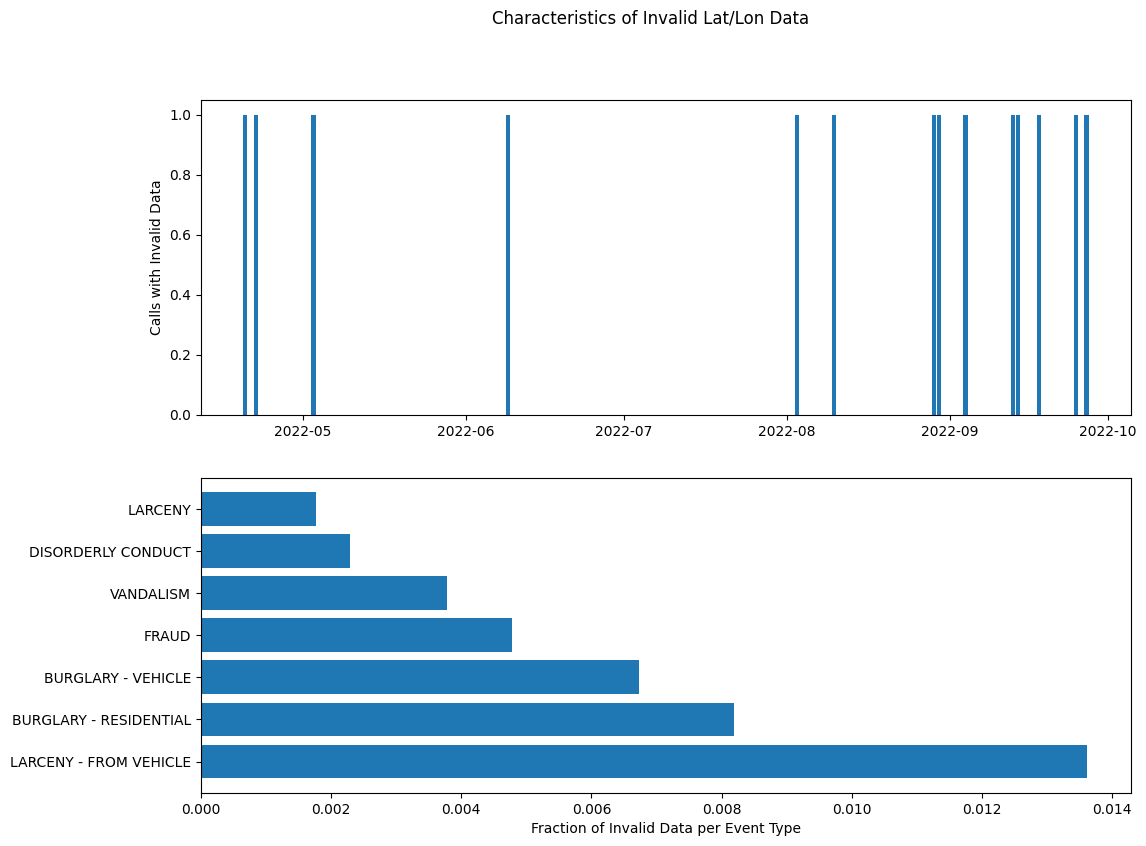

In [ ]:
# Run this cell to generate the plot, no further action is needed
missing_by_time = (pd.to_datetime(invalid_block_loc['EVENTDT'], format='%m/%d/%Y %I:%M:%S %p')
                   .value_counts()
                   .sort_index()
                  )
missing_by_crime = (invalid_block_loc['CVLEGEND']
                    .value_counts()
                    / calls['CVLEGEND'].value_counts()
                   ).dropna().sort_values(ascending=False)

fig, ax = plt.subplots(2)
ax[0].bar(missing_by_time.index, missing_by_time)
ax[0].set_ylabel("Calls with Invalid Data")
ax[1].barh(missing_by_crime.index, missing_by_crime)
ax[1].set_xlabel("Fraction of Invalid Data per Event Type")
fig.suptitle("Characteristics of Invalid Lat/Lon Data")
plt.show()

<!-- BEGIN QUESTION -->


Based on the plots above, are there any patterns among entries that are invalid latitude/longitude data? The dataset information [linked](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5) at the top of this notebook may also give more context.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br>

---
### Question 3e: Explore

The below cell plots a map of phone calls by GPS coordinates (latitude, longitude); we drop invalid location data.

In [ ]:
# Run this cell to generate the interactive plot, no further code is needed.
import folium
import folium.plugins

BERKELEY_COORDINATES = (37.87, -122.28)
berkeley_map = folium.Map(location=BERKELEY_COORDINATES, zoom_start=13)
locs = calls.drop(invalid_block_loc.index)[['Lat', 'Lon']].astype('float').values
heatmap = folium.plugins.HeatMap(locs.tolist(), radius=10)
berkeley_map.add_child(heatmap)

<!-- BEGIN QUESTION -->

Based on the above map, what could be some **drawbacks** of using the location fields in this dataset to draw conclusions about crime in Berkeley? This is an open-ended question. Here are some sub-questions to consider:
* Is campus really the safest place to be?
* Why are all the calls located at street intersections, outdoors, and not within buildings?

_Type your answer here, replacing this text._